# Задания 3. Модели линейной регрессии 

## Цель задания:
### 1.Рассмотреть основные подходы к исследованию взаимосвязей в экономике
### 2.Изучить модель парной линейной регрессии
### 3.Изучить модель множественной линейной регрессии
### 4.Рассмотреть тесты, позволяющие проверить выполнение основных предпосылок регрессионных моделей


## Цель исследования - выявить показатели, влияющие на темп роста ВВП

## 1.Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.api as test ### регрессионные тесты
import statsmodels.stats.outliers_influence ### регрессионные тесты

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt # графическая библиотека
import seaborn as sns

In [4]:
import warnings

In [5]:
warnings.simplefilter('ignore')

## 2.Загрузка необходимых файлов

In [6]:
path='/Users/massimozharkovsky/Documents/ML/Econometrics/'

In [7]:
pd.set_option('display.max_colwidth',-1)# опция позволяет читать текстовые поля в "необрезанном виде"

In [8]:
econ_model=pd.read_csv(path+'econ_model_regression.csv')# загрузка данных IMF в dataframe

In [9]:
ind=pd.read_csv(path+'ind_model.csv')#загрузка базы индикаторов в dataframe

## 3. Выбор показателей для дальнейшего анализа и подготовка данных

### Для более компактного представления результатов приведен готовый список используемых показателей.  Каждый слушатель самостоятельно формирует  перечень экономических показателей.

### Для проведения ргрессионного анализа сформируем пространственную выборку по данным 2016 г.

In [10]:
econ_model.head()

,Country,Year,BN.CAB.XOKA.GD.ZS,BX.KLT.DINV.WD.GD.ZS,CM.MKT.LCAP.GD.ZS,FM.LBL.BMNY.GD.ZS,FM.LBL.BMNY.ZG,FP.CPI.TOTL,FP.CPI.TOTL.ZG,FS.AST.DOMS.GD.ZS,...,NE.IMP.GNFS.KD.ZG,NE.IMP.GNFS.ZS,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.CD,NY.GDP.PCAP.KD.ZG,NY.GDP.PCAP.PP.CD,NY.GNS.ICTR.ZS,PX.REX.REER,SI.POV.NAGP,SL.UEM.TOTL.ZS
0,ABW,1995,-0.021154,-0.418844,NaN,53.362723,5.226240,62.495348,3.361391,39.427707,...,NaN,86.476424,2.547143,16439.356361,-2.079505,28648.990020,30.945783,NaN,NaN,NaN
1,ABW,1996,-5.007834,6.121135,NaN,52.671560,3.151332,64.511003,3.225288,43.411804,...,NaN,88.699785,1.185790,16586.068436,-2.311930,28499.089435,24.846061,NaN,NaN,NaN
2,ABW,1997,-12.781801,12.789095,NaN,49.623985,4.590348,66.446300,2.999948,42.331539,...,NaN,86.245250,7.046872,17927.749635,4.226981,30215.949226,24.319337,NaN,NaN,NaN
3,ABW,1998,-1.127316,5.019242,NaN,51.628167,13.081772,67.688506,1.869489,41.174523,...,NaN,83.642842,1.991988,19078.343191,-0.141877,30512.683909,27.073373,NaN,NaN,NaN
4,ABW,1999,-25.279443,26.875845,NaN,55.097071,10.416996,69.232056,2.280372,44.554334,...,NaN,84.635564,1.238039,19356.203389,-0.727461,30728.054500,20.645241,NaN,NaN,NaN


In [11]:
ind.head()

,Series Code,Series Name
0,BN.CAB.XOKA.GD.ZS,Current account balance (% of GDP)
1,BX.KLT.DINV.WD.GD.ZS,"Foreign direct investment, net inflows (% of GDP)"
2,CM.MKT.LCAP.GD.ZS,Market capitalization of listed domestic companies (% of GDP)
3,FM.LBL.BMNY.GD.ZS,Broad money (% of GDP)
4,FM.LBL.BMNY.ZG,Broad money growth (annual %)


In [12]:
econ_model=econ_model[econ_model.Year==2016].drop(columns='Year')

In [13]:
econ_model.head()

,Country,BN.CAB.XOKA.GD.ZS,BX.KLT.DINV.WD.GD.ZS,CM.MKT.LCAP.GD.ZS,FM.LBL.BMNY.GD.ZS,FM.LBL.BMNY.ZG,FP.CPI.TOTL,FP.CPI.TOTL.ZG,FS.AST.DOMS.GD.ZS,FS.AST.PRVT.GD.ZS,...,NE.IMP.GNFS.KD.ZG,NE.IMP.GNFS.ZS,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.CD,NY.GDP.PCAP.KD.ZG,NY.GDP.PCAP.PP.CD,NY.GNS.ICTR.ZS,PX.REX.REER,SI.POV.NAGP,SL.UEM.TOTL.ZS
21,ABW,5.329558,0.792699,NaN,87.935838,9.500907,102.485245,-0.886758,69.810511,64.501013,...,NaN,74.630646,-0.211225,25239.600411,-0.716487,38390.271649,9.798360,NaN,NaN,NaN
45,AFG,-21.745688,0.483360,NaN,34.637391,9.725428,138.708666,4.383892,-1.186978,3.618246,...,NaN,41.725695,2.260314,547.228110,-0.541697,1896.992520,14.734625,NaN,NaN,1.634
69,AGO,-3.050908,-0.177523,NaN,39.162307,13.468242,213.197420,32.377734,27.334951,21.097875,...,-24.738901,25.245671,-2.580097,3506.072885,-5.816237,6756.935074,24.443308,NaN,NaN,7.281
93,ALB,-7.590727,8.804978,NaN,85.804951,3.887582,112.825527,1.275125,61.497946,36.626867,...,6.920120,45.831960,3.314805,4124.108907,3.480117,11868.178968,17.053212,NaN,NaN,15.220
117,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.889124,37224.108916,2.830284,NaN,NaN,NaN,NaN,NaN


### Проведем предварительный отбор переменных с учетом количества nan наблюдений для каждого показателя. Не существует формальных критериев выбора переменных,  данный этап анализа необходимо производить с учетом целей и задач всего исследования. Одним из факторов,влияющих на отбор показателей, является количество nan наблюдений.

In [14]:
null_columns=econ_model.iloc[:,1:].isnull().sum() 
# вспомогательный массив, содержащий количество nan наблюдений для каждого показателя

In [15]:
type(null_columns)
# данный массив представляет из себя тип Series, одномерный вариант dataframe   

pandas.core.series.Series

In [16]:
null_columns=null_columns.rename('NaN')
# для дальнейшей работы с типом Series необходимо присвоить ему имя 

In [17]:
null_columns.head()

BN.CAB.XOKA.GD.ZS       34 
BX.KLT.DINV.WD.GD.ZS    22 
CM.MKT.LCAP.GD.ZS       147
FM.LBL.BMNY.GD.ZS       61 
FM.LBL.BMNY.ZG          60 
Name: NaN, dtype: int64

### Объединим два массива для удобства дальнейшего отбора показателей

In [18]:
ind.merge(null_columns,left_on='Series Code',right_on=null_columns.index)

,Series Code,Series Name,NaN
0,BN.CAB.XOKA.GD.ZS,Current account balance (% of GDP),34
1,BX.KLT.DINV.WD.GD.ZS,"Foreign direct investment, net inflows (% of GDP)",22
2,CM.MKT.LCAP.GD.ZS,Market capitalization of listed domestic companies (% of GDP),147
3,FM.LBL.BMNY.GD.ZS,Broad money (% of GDP),61
4,FM.LBL.BMNY.ZG,Broad money growth (annual %),60
5,FP.CPI.TOTL,Consumer price index (2010 = 100),39
6,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",38
7,FS.AST.DOMS.GD.ZS,Domestic credit provided by financial sector (% of GDP),40
8,FS.AST.PRVT.GD.ZS,Domestic credit to private sector (% of GDP),39
9,GC.DOD.TOTL.GD.ZS,"Central government debt, total (% of GDP)",170


### Проведем предварительный отбор переменных, учитывая цели и задачи  исследования

### Для построения модели линейной регрессии будем использовать следующие показатели:
### BN.CAB.XOKA.GD.ZS Current account balance (% of GDP) (Баланс счета текущих операций к ВВП,%)
### BX.KLT.DINV.WD.GD.ZS Foreign direct investment, net inflows (% of GDP) (Чистый приток иностранных инвестиций к ВВП,%)
### FP.CPI.TOTL.ZG Inflation, consumer prices (annual %) (Инфляция, %)
### NE.GDI.TOTL.ZS Gross capital formation (% of GDP) (Валовое образование капитала,%)
### NY.GDP.MKTP.KD.ZG GDP growth (annual %) (Рост ВВП,%)
### NY.GDP.PCAP.PP.CD GDP per capita, PPP (current international USD) (ВВП по паритету покупательной способности, доллары США)
### SL.UEM.TOTL.ZS Unemployment, total (% of total labor force) (modeled ILO estimate), (Безработица,%)

In [19]:
col_list=list(ind.iloc[[0,1,6,17,20,23,27],0]) # вспомогательный список, содержащий анализируемые показатели

In [20]:
econ_model.index=econ_model.Country # переиндексация массива (код страны - новый индекс)

### Наложим фильтр на исходный массив 

In [21]:
econ_model=econ_model[col_list]

In [22]:
econ_model.isnull().sum()
# определяем количество nan наблюдений

BN.CAB.XOKA.GD.ZS       34
BX.KLT.DINV.WD.GD.ZS    22
FP.CPI.TOTL.ZG          38
NE.GDI.TOTL.ZS          42
NY.GDP.MKTP.KD.ZG       10
NY.GDP.PCAP.PP.CD       21
SL.UEM.TOTL.ZS          26
dtype: int64

### Удалим страны, в которых присутствуют nan наблюдения

In [23]:
econ_model.dropna(inplace=True)

In [24]:
econ_model.shape
## В итоге осталось 144 страны и 7 показателей

(144, 7)

### Преобразуем переменную NY.GDP.PCAP.PP.CD в логарифмическую шкалу 

In [25]:
econ_model['NY.GDP.PCAP.PP.CD']=np.log(econ_model['NY.GDP.PCAP.PP.CD'])

In [26]:
econ_model.head()

,BN.CAB.XOKA.GD.ZS,BX.KLT.DINV.WD.GD.ZS,FP.CPI.TOTL.ZG,NE.GDI.TOTL.ZS,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.PP.CD,SL.UEM.TOTL.ZS
Country,,,,,,,
AFG,-21.745688,0.483360,4.383892,17.808790,2.260314,7.548025,1.634000
AGO,-3.050908,-0.177523,32.377734,27.214708,-2.580097,8.818325,7.281000
ALB,-7.590727,8.804978,1.275125,25.223824,3.314805,9.381616,15.220000
ARM,-2.061092,3.164508,-1.403608,18.015509,0.200000,9.083481,17.617001
AUS,-3.395593,3.244887,1.276991,25.371979,2.770657,10.764390,5.711000


##  4. Корреляционный анализ

In [27]:
alpha=0.05 # установим уровень значимости для проверки гипотез

### Построим корреляционную матрицу с помощью  pandas

In [28]:
econ_model.corr()

,BN.CAB.XOKA.GD.ZS,BX.KLT.DINV.WD.GD.ZS,FP.CPI.TOTL.ZG,NE.GDI.TOTL.ZS,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.PP.CD,SL.UEM.TOTL.ZS
BN.CAB.XOKA.GD.ZS,1.000000,0.102876,-0.160610,-0.289430,-0.108743,0.511227,-0.055555
BX.KLT.DINV.WD.GD.ZS,0.102876,1.000000,-0.089575,-0.005713,0.073494,0.201386,-0.015384
FP.CPI.TOTL.ZG,-0.160610,-0.089575,1.000000,0.060945,-0.184326,-0.337179,-0.082014
NE.GDI.TOTL.ZS,-0.289430,-0.005713,0.060945,1.000000,0.229779,-0.022714,-0.181009
NY.GDP.MKTP.KD.ZG,-0.108743,0.073494,-0.184326,0.229779,1.000000,-0.238473,-0.204679
NY.GDP.PCAP.PP.CD,0.511227,0.201386,-0.337179,-0.022714,-0.238473,1.000000,0.061695
SL.UEM.TOTL.ZS,-0.055555,-0.015384,-0.082014,-0.181009,-0.204679,0.061695,1.000000


### Пример проверки значимости коэффициента корреляции ($\alpha$=0.05)

In [29]:
stats.pearsonr(econ_model.iloc[:,1], econ_model.iloc[:,4])

(0.0734939039710778, 0.38134263261280366)

###  Т.к. p-value  > 0.05, гипотеза о равенстве нулю коэффициента корреляции не отвергается. Статистическая связь между указанными показателями отсутствует.

## 5.Модель парной линейной регрессии

### В качестве зависимой переменной Y выступает показатель темпа роста ВВП, в качестве объясняющей переменной X возьмем отношение общего объема инвестиций к ВВП.

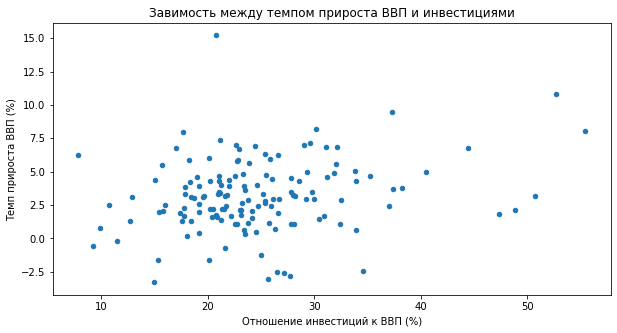

In [30]:
p=econ_model.plot.scatter(x='NE.GDI.TOTL.ZS',y='NY.GDP.MKTP.KD.ZG',title='Завимость между темпом прироста ВВП и инвестициями',figsize=(10,5),)
p.set(xlabel='Отношение инвестиций к ВВП (%)',ylabel='Темп прироста ВВП (%)')
plt.show()

In [31]:
n=econ_model.shape[0] # общее число наблюдений 
n

144

In [32]:
k=2 # общее число коэффициентов регрессии с учетом свободного члена

In [33]:
Y=econ_model['NY.GDP.MKTP.KD.ZG']

In [34]:
X=sm.add_constant(econ_model['NE.GDI.TOTL.ZS'],prepend=True)
# добавим единичный вектор к вектору X - для плучения модели со свободной переменной

In [35]:
X.head()

,const,NE.GDI.TOTL.ZS
Country,,
AFG,1.0,17.808790
AGO,1.0,27.214708
ALB,1.0,25.223824
ARM,1.0,18.015509
AUS,1.0,25.371979


In [36]:
sm.OLS(Y,X).fit().summary()
# вызов процедуры МНК и визуализация результатов

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      NY.GDP.MKTP.KD.ZG   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     7.915
Date:                Wed, 18 May 2022   Prob (F-statistic):            0.00560
Time:                        23:08:57   Log-Likelihood:                -343.57
No. Observations:                 144   AIC:                             691.1
Df Residuals:                     142   BIC:                             697.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.2727      0.715      1.781      0.077      -0.140       2.685
NE.GDI.TOTL.ZS     0.0776      0.028      2.813      0.006       0.023       0.132
==============================================================================
Omnibus:                       19.613   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.461
Skew:                           0.487   Prob(JB):                     1.10e-11
Kurtosis:                       5.732   Cond. No.                         84.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Проведем "ручной" расчет

<font size='5'>$b_1=\frac{cov(x,y)}{var(x)}$</font>

In [37]:
b1=np.mean(np.multiply((econ_model['NE.GDI.TOTL.ZS']-np.mean(econ_model['NE.GDI.TOTL.ZS'])),
(econ_model['NY.GDP.MKTP.KD.ZG']-np.mean(econ_model['NY.GDP.MKTP.KD.ZG']))))/(np.mean((econ_model['NE.GDI.TOTL.ZS']-np.mean(econ_model['NE.GDI.TOTL.ZS']))**2))

<font size='5'>$b_0=\overline{y}-\overline{x}b_1$</font>

In [38]:
b0=np.mean(econ_model['NY.GDP.MKTP.KD.ZG'])-np.mean(econ_model['NE.GDI.TOTL.ZS'])*b1

In [39]:
b0,b1

(1.2726730266321633, 0.07757510668891016)

In [40]:
Y_hat=b0+b1*econ_model['NE.GDI.TOTL.ZS']
# выравненные значения переменной Y

In [41]:
Y_hat.head()

Country
AFG    2.654192
AGO    3.383857
ALB    3.229414
ARM    2.670228
AUS    3.240907
Name: NE.GDI.TOTL.ZS, dtype: float64

In [42]:
resid=(Y-Y_hat)
# остатки уравнения регрессии

In [43]:
np.mean(resid)
# проверка равенства нулю среднего значения остатков

2.279041153327752e-15

### Проверка нормальности распределения остатков

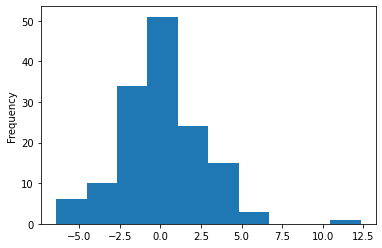

In [44]:
resid.plot(kind='hist')

In [45]:
stats.normaltest(resid)

NormaltestResult(statistic=19.612954293133665, pvalue=5.509359198029422e-05)

### Вывод: распределение существенно отличается от нормального закона, т.к. p-value <  $\alpha$

In [46]:
SSR=np.sum((resid)**2)
SSR
# cумма квадратов остатков уравнения регрессии, необходима для дальнейших расчетов

996.0451129437411

### Коэффициент детерминации $R^2=1-\frac{SSR}{\sum(y_i-\overline{y})^2}$

In [47]:
R_sq=1-(SSR/np.sum((econ_model['NY.GDP.MKTP.KD.ZG']-np.mean(econ_model['NY.GDP.MKTP.KD.ZG']))**2))
R_sq

0.05279861119835749

### Скорректированный коэффициент детерминации $R^2=1-\frac{(1-R^2)(n-1)}{n-k}$

In [48]:
R_sq_adjusted=1-(((1-R_sq)*(n-1))/(n-k))
R_sq_adjusted

0.04612817888285292

In [49]:
R_sq**.5
# коэффициент корреляции (парный совпадает со множественным)

0.22977948384996755

### Проверим гипотезу $H_0:\beta_1=0$

### Для этой цели рассчитаем стандартные ошибки коэффициентов регрессии, используя ковариационную матрицу коэффициентов регрессии $\sigma^2(X^{'}X)^{-1}$ 

###  $\sigma^2$ - вариация остатков

In [50]:
A=np.vstack([np.ones(n),econ_model['NE.GDI.TOTL.ZS']]).T
# добавим единичный вектор к вектору X - для получения модели со свободной переменной

In [51]:
S_2=np.dot(A.T,A)
S_2=np.linalg.inv(S_2)
S_2

array([[ 0.07281414, -0.00267199],
       [-0.00267199,  0.00010839]])

In [52]:
std_err=((SSR/(n-k))*S_2[1,1])**.5
std_err # стандартная ошибка коэффициента регрессии

0.0275732604367577

<font size='5'>$t=\frac{b_1}{s}$</font>

In [53]:
t=b1/std_err
t # t-критерий Стьюдента

2.813417980323262

###  Табличное значение t-критерия Стьюдента (двусторонняя критическая область):

In [54]:
stats.t.ppf(1-alpha/2,n-k)

1.9768109936200895

In [55]:
2*(1-stats.t.cdf(np.abs(t),n-k))# p-value

0.005597146681518783

### Сравнение табличного значения критерия и рассчетного говорит о том, что коэффициент значим (этот же вывод мы можем сделать и на основании p-value)

### Построение интервальной оценки коэффициента регрессии 

In [56]:
delta=stats.t.ppf(.975,n-k)*std_err
delta
# построение интервальной оценки коэффициента регрессии

0.054507124361332496

### С вероятностью 95% коэф.регресси находится в пределах:

In [57]:
b1-delta,b1+delta

(0.02306798232757766, 0.13208223105024264)

### Проверка значимости уравнения регрессии. В случае двумерной модели совпадает с проверкой значимости коэффициента регрессии.

In [58]:
t**2 # Для парной регрессии t-критерий Стьдента в квадрате равен F- критерию Фишера-Снедекора

7.915320732006222

### F-критерий $F=\frac{\frac{\sum(y_i-\overline{y})^2-\sum(y_i-\hat{y})^2}{(k-1)}}{\frac{\sum(y_i-\hat{y})^2}{(n-k)}}$ 

In [59]:
F=((np.var(econ_model['NY.GDP.MKTP.KD.ZG'])*n-SSR)/(k-1))/(SSR/(n-k))
F 

7.915320732006193

In [60]:
1-stats.f.cdf(F,k-1,n-k)# p-value

0.005597146681518783

### Табличное значение критерия F (односторонняя критическая область):

In [61]:
stats.f.ppf(1-alpha,k-1,n-k)# табличное значение критерия 

3.9077817045477476

### Функция правдоподобия $ln\lbrack\prod_{i=1}^{n}\frac{1}{\sigma\sqrt{2\pi}}exp(-\frac{(y_i-\hat{y_i})^2}{2\sigma^2})\rbrack$

In [62]:
L=(1/np.sqrt(2*np.pi*(SSR/n)))**n*np.exp(-SSR/((SSR/n)*2))
np.log(L)

-343.573654860894

### Общий вывод: Уравнение регрессии значимо, о чем свидетельствуют значения F-критерия.  Выявленная взаимосвязь   слабая - коэффициент детерминации равен 0.053, т.е. только 5.3% прироста ВВП объясняется долей инвестиций ВВП. Интерпретация коэффициента регрессии - увеличение доли инвестиций в ВВП на 1 п.п. увеличивает рост ВВП на 0.078 п.п.

## 6. Модель множественной регрессии

### В качестве зависимой переменной Y будем рассматривать показатель темпа роста ВВП, в качестве объясняющих возьмем остальные экономические показатели (таким образом, X - уже не вектор, а матрица).

In [63]:
econ_model.head()

,BN.CAB.XOKA.GD.ZS,BX.KLT.DINV.WD.GD.ZS,FP.CPI.TOTL.ZG,NE.GDI.TOTL.ZS,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.PP.CD,SL.UEM.TOTL.ZS
Country,,,,,,,
AFG,-21.745688,0.483360,4.383892,17.808790,2.260314,7.548025,1.634000
AGO,-3.050908,-0.177523,32.377734,27.214708,-2.580097,8.818325,7.281000
ALB,-7.590727,8.804978,1.275125,25.223824,3.314805,9.381616,15.220000
ARM,-2.061092,3.164508,-1.403608,18.015509,0.200000,9.083481,17.617001
AUS,-3.395593,3.244887,1.276991,25.371979,2.770657,10.764390,5.711000


In [64]:
X_m=sm.add_constant(econ_model.iloc[:,[0,1,2,3,5,6]],prepend=True)
# формирование матрицы независимых переменных с учетом единичного вектора

In [65]:
X_m.head()

,const,BN.CAB.XOKA.GD.ZS,BX.KLT.DINV.WD.GD.ZS,FP.CPI.TOTL.ZG,NE.GDI.TOTL.ZS,NY.GDP.PCAP.PP.CD,SL.UEM.TOTL.ZS
Country,,,,,,,
AFG,1.0,-21.745688,0.483360,4.383892,17.808790,7.548025,1.634000
AGO,1.0,-3.050908,-0.177523,32.377734,27.214708,8.818325,7.281000
ALB,1.0,-7.590727,8.804978,1.275125,25.223824,9.381616,15.220000
ARM,1.0,-2.061092,3.164508,-1.403608,18.015509,9.083481,17.617001
AUS,1.0,-3.395593,3.244887,1.276991,25.371979,10.764390,5.711000


In [66]:
k_m=X_m.shape[1] # количество переменных
k_m

7

In [67]:
Y_m=np.asarray(econ_model['NY.GDP.MKTP.KD.ZG'])

In [68]:
Y_m=Y_m[:,np.newaxis]

In [69]:
Y_m.shape

(144, 1)

In [70]:
model_linear_m=sm.OLS(Y_m,X_m)
# создание модели

In [71]:
results=model_linear_m.fit()

In [72]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     7.247
Date:                Wed, 18 May 2022   Prob (F-statistic):           9.82e-07
Time:                        23:08:57   Log-Likelihood:                -327.63
No. Observations:                 144   AIC:                             669.3
Df Residuals:                     137   BIC:                             690.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.9067 

<font size='5'>$\beta=(X^{'}X)^{-1}(X^{'}Y)$</font>

In [73]:
Betas=np.dot(np.linalg.inv(np.dot(X_m.T,X_m)),np.dot(X_m.T,Y_m))
# расчет коэффициентов регрессии

In [74]:
Betas

array([[10.90667606],
       [ 0.03069693],
       [ 0.0325133 ],
       [-0.17458415],
       [ 0.08109963],
       [-0.9191583 ],
       [-0.07083114]])

In [75]:
Y_hat_m=np.dot(X_m,Betas)
# выравненные значения переменной Y

In [76]:
Y_hat_m[0:10]

array([[ 3.88022608],
       [-1.2594435 ],
       [ 3.08172883],
       [ 3.05540531],
       [ 2.44396456],
       [ 2.15509137],
       [ 1.76184652],
       [ 4.14116147],
       [ 2.38541908],
       [ 5.57670253]])

In [77]:
resid_m=Y_m-Y_hat_m
# остатки уравнения регессии

In [78]:
np.mean(resid_m)
# среднее значение остатков незначимо отличается от нуля

-7.48691232467359e-14

In [79]:
stats.normaltest(resid_m)
# проверка нормальности распределения остатков

NormaltestResult(statistic=array([30.80535973]), pvalue=array([2.0450368e-07]))

In [80]:
SSR_m=np.sum((resid_m)**2)
SSR_m
# cумма квадратов остатков уравнения регрессии

798.2295141788246

### Проверим гипотезы $H_0:\beta_i=0$ для каждого коэффициента регрессии

### Используем тот же подход и формулы, как и в случае парной регрессии

In [81]:
S_2_m=np.linalg.inv(np.dot(X_m.T,X_m))

In [82]:
sigma_sq_m=((SSR_m/(n-k_m))*S_2_m)
sigma_sq_m

array([[ 4.35410651e+00,  2.57383127e-02,  4.37248848e-03,
        -3.04982487e-02, -8.77699374e-03, -4.12925619e-01,
        -5.85873212e-03],
       [ 2.57383127e-02,  9.02329783e-04,  3.18581752e-06,
        -3.28663138e-05,  2.86970245e-04, -3.31145010e-03,
         1.79232866e-04],
       [ 4.37248848e-03,  3.18581752e-06,  4.61057923e-04,
         2.30940338e-05,  3.88821737e-06, -7.33835434e-04,
         2.32704223e-05],
       [-3.04982487e-02, -3.28663138e-05,  2.30940338e-05,
         1.84800993e-03, -6.05668936e-05,  2.66602664e-03,
         7.76690951e-05],
       [-8.77699374e-03,  2.86970245e-04,  3.88821737e-06,
        -6.05668936e-05,  7.45663414e-04, -1.07692900e-03,
         2.13556559e-04],
       [-4.12925619e-01, -3.31145010e-03, -7.33835434e-04,
         2.66602664e-03, -1.07692900e-03,  4.57124405e-02,
        -9.20008228e-04],
       [-5.85873212e-03,  1.79232866e-04,  2.32704223e-05,
         7.76690951e-05,  2.13556559e-04, -9.20008228e-04,
         1.2305138

In [83]:
std_err_betas=np.sqrt(sigma_sq_m.diagonal())
std_err_betas=std_err_betas[:,np.newaxis]
std_err_betas
# стандартная ошибка коэффициентов регрессии

array([[2.08664959],
       [0.0300388 ],
       [0.02147226],
       [0.04298849],
       [0.02730684],
       [0.21380468],
       [0.03507868]])

In [84]:
t_m=Betas/std_err_betas
t_m
# t-критерий для коэффицентов регрессии

array([[ 5.22688434],
       [ 1.02190927],
       [ 1.51420045],
       [-4.06118395],
       [ 2.96993849],
       [-4.29905605],
       [-2.01920767]])

In [85]:
(2*(1-stats.t.cdf(np.abs(t_m),n-k_m)))
# p-value

array([[6.28671847e-07],
       [3.08624970e-01],
       [1.32278686e-01],
       [8.17518929e-05],
       [3.51798440e-03],
       [3.23477955e-05],
       [4.54164790e-02]])

### Проверим значимость уравнения ререссии, гипотеза $H_0:\beta_1=...=\beta_k=0$ 

In [86]:
F_m=((np.var(econ_model['NY.GDP.MKTP.KD.ZG'])*n-SSR_m)/(k_m-1))/(SSR_m/(n-k_m))
F_m
# F-критерий

7.246693407276151

In [87]:
1-stats.f.cdf(F_m,k_m-1,n-k_m)# p-value

9.820021912299026e-07

### В общем случае проверка  значимости коэффициентов регрессии осуществляется с использованием комбинации линейных ограничений: $R\beta=q$

In [88]:
R=np.identity(7) # создание единичной матрицы

In [89]:
print(np.array(R))

[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


### Тестируем 6 линейных ограничений (все коэфф. регрессии кроме свободного члена равны 0)

In [90]:
print(results.f_test(R[1:,])) # тестируем 6 линейных ограничений (все коэфф. регресси кроме свободного члена равны 0)

<F test: F=7.246693407276164, p=9.820021912133978e-07, df_denom=137, df_num=6>


### Результаты совпадают с предыдущим тестом (иначе и не может быть)

### Проверим дополнительно гипотезу об одновременном равентстве нулю только коэффициентов регрессии для инфляции и инвестиций 

In [91]:
R[[3,4],:]

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.]])

In [92]:
print(results.f_test(R[[3,4],:])) 

<F test: F=12.066680219469994, p=1.4898911424703721e-05, df_denom=137, df_num=2>


In [93]:
1-stats.f.cdf(results.f_test(R[[3,4],:]).fvalue,k_m-5,n-k_m)# p-value

1.4898911424698902e-05

### Гипотеза об одновременном равенстве 0 двух рассмотренных коэффициентов отвергается (p-value<$\alpha$)

In [94]:
R_sq_m=1-(SSR_m/np.sum((econ_model['NY.GDP.MKTP.KD.ZG']-np.mean(econ_model['NY.GDP.MKTP.KD.ZG']))**2))
R_sq_m
# коэффициент детерминации

0.24091379538212898

In [95]:
R_sq_adjusted=1-(((1-R_sq_m)*(n-1))/(n-k_m))
R_sq_adjusted
# скорректированный коэффициент детерминации

0.20766914408499593

In [96]:
L=(1/np.sqrt(2*np.pi*(SSR_m/n)))**n*np.exp(-SSR_m/((SSR_m/n)*2))
np.log(L)
# логарифмическая функция правдоподобия

-327.6331152972289

### Выводы: Уравнение регрессии значимо (p-value F-критерия существенно меньше уровня значимости $\alpha$).  Модель объясняет 24.1% вариации роста ВВП. Две переменных, а именно BN.CAB.XOKA.GD.ZS, BX.KLT.DINV.WD.GD.ZS, оказались незначимы. Интерпретация каждого из коэффициентов регрессии осуществляется по аналогии с парной моделью.

## 7. Построение модели множественной регрессии пошаговым методом

### В предыдущем разделе была рассмотрена множественная регрессионная модель, в которую вошли все независимые переменные. Однако на практике такой подход не всегда оправдан. При большом количестве переменных пользуются пошаговым методом. Это означает, что на каждом шаге мы включаем или исключаем переменные в зависимости от значимости коэффициентов регрессии (формальный критерий не всегда является окончательным решением).

### Шаг 1. Начинаем построение модели с двух переменных BN.CAB.XOKA.GD.ZS и BX.KLT.DINV.WD.GD.ZS (текущий баланс и прямые инвестиции)

In [97]:
X_m=sm.add_constant(econ_model.iloc[:,[0,1]],prepend=True)

In [98]:
sm.OLS(Y_m,X_m).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.371
Date:                Wed, 18 May 2022   Prob (F-statistic):              0.257
Time:                        23:08:58   Log-Likelihood:                -346.09
No. Observations:                 144   AIC:                             698.2
Df Residuals:                     141   BIC:                             707.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.9475      0.271     10.895      0.000       2.413       3.482
BN.CAB.XOKA.GD.ZS       -0.0380      0.027     -1.402      0.163      -0.092       0.016
BX.KLT.DINV.WD.GD.ZS     0.0242      0.024      1.021      0.309      -0.023       0.071
==============================================================================
Omnibus:                       19.878   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.996
Skew:                           0.506   Prob(JB):                     1.39e-11
Kurtosis:                       5.704   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Уравнение незначимо, что следует из значения F-критерия (p-value)

### Шаг 2. Включаем в модель переменные FP.CPI.TOTL.ZG и NE.GDI.TOTL.ZS (инфляция и инвестиции)

In [99]:
X_m=sm.add_constant(econ_model.iloc[:,[2,3]],prepend=True)

In [100]:
sm.OLS(Y_m,X_m).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     7.167
Date:                Wed, 18 May 2022   Prob (F-statistic):            0.00109
Time:                        23:08:58   Log-Likelihood:                -340.51
No. Observations:                 144   AIC:                             687.0
Df Residuals:                     141   BIC:                             695.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.5253      0.709      2.150      0.033       0.123       2.928
FP.CPI.TOTL.ZG    -0.1078      0.044     -2.476      0.014      -0.194      -0.022
NE.GDI.TOTL.ZS     0.0817      0.027      3.009      0.003       0.028       0.135
==============================================================================
Omnibus:                       22.908   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.842
Skew:                           0.654   Prob(JB):                     9.12e-12
Kurtosis:                       5.600   Cond. No.                         85.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Уравнение  значимо, что следует из значения F-критерия, однако связь носит достаточно слабый характер

### Шаг 3. Добавляем переменную NY.GDP.PCAP.PP.CD (логарифм ВВП по ППС)

In [101]:
X_m=sm.add_constant(econ_model.iloc[:,[2,3,5]],prepend=True)

In [102]:
sm.OLS(Y_m,X_m).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     11.22
Date:                Wed, 18 May 2022   Prob (F-statistic):           1.20e-06
Time:                        23:08:58   Log-Likelihood:                -331.96
No. Observations:                 144   AIC:                             671.9
Df Residuals:                     140   BIC:                             683.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 8.9947      1.900      4.733      0.000       5.237      12.752
FP.CPI.TOTL.ZG       -0.1696      0.044     -3.879      0.000      -0.256      -0.083
NE.GDI.TOTL.ZS        0.0814      0.026      3.172      0.002       0.031       0.132
NY.GDP.PCAP.PP.CD    -0.7707      0.183     -4.201      0.000      -1.133      -0.408
==============================================================================
Omnibus:                       26.269   Durbin-Watson:                   1.642
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.047
Skew:                           0.578   Prob(JB):                     1.70e-20
Kurtosis:                       6.720   Cond. No.                         257.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Включенная переменная - логарифм ВВП по ППС  -  улучшила качество модели. Модель  объясняет порядка 20% вариации переменной Y. На улучшение качества модели также указывают значения критериев Log-Likelihood (логарифмическая функция правдоподобия), AIC и BIC.

### Шаг 4. Добавляем переменную SL.UEM.TOTL.ZS (безработица)

In [103]:
X_m=sm.add_constant(econ_model.iloc[:,[2,3,5,6]],prepend=True)

In [104]:
model_step=sm.OLS(Y,X_m).fit()

In [105]:
model_step.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      NY.GDP.MKTP.KD.ZG   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     9.945
Date:                Wed, 18 May 2022   Prob (F-statistic):           4.17e-07
Time:                        23:08:58   Log-Likelihood:                -329.36
No. Observations:                 144   AIC:                             668.7
Df Residuals:                     139   BIC:                             683.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.7301      1.901      5.118      0.000       5.971      13.489
FP.CPI.TOTL.ZG       -0.1751      0.043     -4.056      0.000      -0.260      -0.090
NE.GDI.TOTL.ZS        0.0711      0.026      2.768      0.006       0.020       0.122
NY.GDP.PCAP.PP.CD    -0.7557      0.181     -4.177      0.000      -1.113      -0.398
SL.UEM.TOTL.ZS       -0.0785      0.035     -2.262      0.025      -0.147      -0.010
==============================================================================
Omnibus:                       26.636   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.866
Skew:                           0.523   Prob(JB):                     3.78e-24
Kurtosis:                       7.109   Cond. No.                         270.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Общий вывод: рост ВВП положительно зависит от валового образования капитала (инвестиции) и отрицательно от инфляции, ВВП по ППС и безработицы.
### Более бедные страны растут быстрее, а снижение инфляции и безработицы положительно влияет на экономический рост. Последний вывод нуждается в проверке, т.к. несколько противоречит кривой Филлипса.

### Критерии AIC и BIC

### С помощью функции Log-Likelihood (логарифмическая функция правдоподобия) и критериев AIC и BIC можно провести сравительный анализ  качества модели. Снижение указанных критериев свидетельствует об улучшении качества модели.

In [106]:
model_step.llf

-329.35810000846305

In [107]:
k=5

In [108]:
AIC=2*k-2*model_step.llf
AIC

668.7162000169261

In [109]:
BIC=k*np.log(n)-2*model_step.llf
BIC

683.5652665148061

## 8.Проверка выполнения предпосылок Гаусса-Маркова

### 8.1. Анализ остатков уравнения регрессии

### Графический анализ остатков позволяет визуализировать отклонения модели от предпосылок теоремы Маркова-Гаусса и провести первичную диагностику модели. Для этих целей используются разные виды графиков. В задании мы остановимся на двух из них.

### График 'Выравненные значения vs Остатки'. Цель построения графика - проанализировать зависимость остатков от выравненных значений переменной Y. С помощью графика можно выявить признаки автокорреляции и гетеоскедастичности.

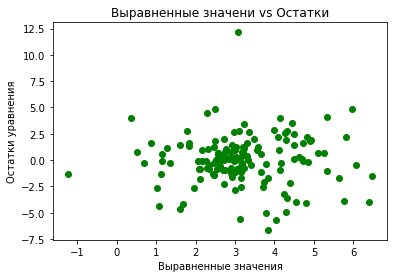

<Figure size 432x288 with 0 Axes>

In [110]:
plt.scatter(x=model_step.fittedvalues,y=model_step.resid, c='green')
plt.title('Выравненные значени vs Остатки')
plt.ylabel('Остатки уравнения')
plt.xlabel('Выравненные значения')
plt.show()
plt.gcf().clear()

### Проверка нормальности распределения остатков 

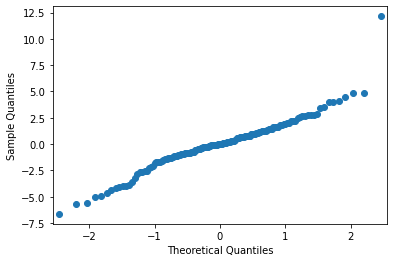

<Figure size 432x288 with 0 Axes>

In [111]:
sm.qqplot(model_step.resid)
plt.show()
plt.gcf().clear()

### Вывод: Визуальный анализ QQ-plot не позволяет сделать однозначный вывод о нормальности рапсределения остатков. Вывод следует делать на основании тестов (например, Jarque-Bera тест), которые говорят о том, что гипотеза нормальности не принимается. Само по себе отсутствие нормальности рапсределения остатков не является препятствием для использования модели, однако стоит обратить внимание на экстремальные значения.

### 8.2. Автокорреляция

### Наличие автокорреляции в остатках может говорить о том, что модель систематически недоучитывает влияние других факторов, невключенных в модель. Для выявления наличия авткорреляции в остатках уравнения регрессии воспользуемся критериями Дарбина-Уотсона и Льюнга-Бокса.

In [112]:
test.acorr_ljungbox(model_step.resid)
###  p-value статистики Льюнга-Бокса

,lb_stat,lb_pvalue
1,4.027416,0.044766
2,4.030979,0.133255
3,4.465919,0.215350
4,4.833441,0.304818
5,6.647046,0.248241
6,6.679047,0.351551
7,6.902324,0.439120
8,6.999826,0.536651
9,7.133566,0.623216
10,15.107377,0.128196


### Критерии Дарбина-Уотсона и статистика Льюнга-Бокса говорят о том, что в остатках присутствует автокорреляция (первый лаг).

### 8.3. Мультиколлинеарность

### Расчет показателя VIF для каждой независимой переменной X

In [113]:
[statsmodels.stats.outliers_influence.variance_inflation_factor(model_step.model.exog,i) 
 for i in range(1,model_step.model.exog.shape[1])]

[1.135456139794824, 1.036184187485341, 1.1297798485861628, 1.0406907328842654]

### Значения VIF меньше 10 для каждого из показателей,можно сделать вывод об отсутствии мультиколлинеарности 

### 8.4. Гетероскедастичность

### Гетероскедастичность означает остутствие постоянства дисперсии остатков. Как и автокорреляция, гетероскедастичность говорит о том, что в модели может отсутствовать важная информация (дополнительные факторы, объясняющие поведение переменной Y). Для проверки наличия гетероскедастичности воспользуемся тестом Бреуша-Пагана. Тест основан на построении и проверки значимости дополнительного уравнения, где в качестве зависимой переменной берется квадрат ошибки.

In [114]:
lm,lm_value,fvalue,f_pvalue=test.het_breuschpagan(model_step.resid,model_step.model.exog)

In [115]:
print('lm %.4f,lm_pvalue %.4f,fvalue %.4f,f_pvalue %.4f'%(lm,lm_value,fvalue,f_pvalue))

lm 2.2309,lm_pvalue 0.6934,fvalue 0.5468,f_pvalue 0.7016


### Для проверки гипотезы используются $\chi^2$ и F-критерий

### Вывод: значения p-value обоих критериев говорят об отсутствии гетероскедастичности

### 8.5. Спецификация модели (RESET test, тест Рамсея)

### Для проверки предпосылки линейности связей в модели используется несколько тестов. Остановимся на тесте Рамсея (RESET). Данный тест предполагает построение дополнительной регрессионной модели. В данной модели в качестве независимых переменных используются степени различных порядков выравненных значений $\hat{Y}$. Если коэффициенты при этих переменных статистически незначимы, линейную спецификацию модели можно считать приемлемой.  

In [116]:
statsmodels.stats.outliers_influence.reset_ramsey(model_step,degree=2)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.5420992846577919, p=0.4628137412283059, df_denom=138, df_num=1>

### P-value больше уровня значимости $\alpha$, следовательно гипотеза о линейности связи в модели  принимается

### 8.6. Графический анализ влияния наблюдений

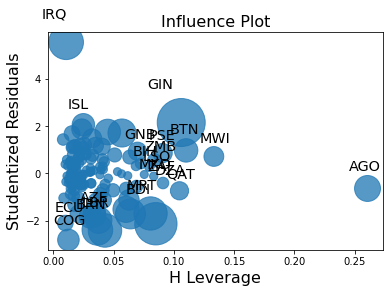

In [117]:
sm.graphics.influence_plot(model_step)
plt.show()

### На графике представлена зависимость "стьюдентезированных остатков" и показателя h-leverage. Оба показателя рассчитываются на основании матрицы проекций (матрицы влияний). 

### Можно выделить влияние двух стран: Ангола, Ирак. Построим уравнение регрессии,исключив две указанные страны.

In [118]:
econ_model.loc[econ_model.index.isin(['AGO','GIN']),:]

,BN.CAB.XOKA.GD.ZS,BX.KLT.DINV.WD.GD.ZS,FP.CPI.TOTL.ZG,NE.GDI.TOTL.ZS,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.PP.CD,SL.UEM.TOTL.ZS
Country,,,,,,,
AGO,-3.050908,-0.177523,32.377734,27.214708,-2.580097,8.818325,7.281
GIN,-31.903600,18.810770,8.172681,52.669842,10.820621,7.681229,3.668


In [119]:
econ_model_reduced=econ_model.loc[~econ_model.index.isin(['AGO','GIN']),:].copy()

In [120]:
econ_model_reduced.shape

(142, 7)

In [121]:
Y_m=np.asarray(econ_model_reduced['NY.GDP.MKTP.KD.ZG'])

In [122]:
Y_m=Y_m[:,np.newaxis]

In [123]:
X_m=sm.add_constant(econ_model_reduced.iloc[:,[0,1,2,3,5,6]],prepend=True)

In [124]:
sm.OLS(Y_m,X_m).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     5.574
Date:                Wed, 18 May 2022   Prob (F-statistic):           3.43e-05
Time:                        23:08:58   Log-Likelihood:                -321.46
No. Observations:                 142   AIC:                             656.9
Df Residuals:                     135   BIC:                             677.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.0117      2.090      5.268      0.000       6.877      15.146
BN.CAB.XOKA.GD.ZS        0.0437      0.030      1.442      0.152      -0.016       0.104
BX.KLT.DINV.WD.GD.ZS     0.0247      0.022      1.147      0.254      -0.018       0.067
FP.CPI.TOTL.ZG          -0.1639      0.049     -3.328      0.001      -0.261      -0.067
NE.GDI.TOTL.ZS           0.0683      0.028      2.470      0.015       0.014       0.123
NY.GDP.PCAP.PP.CD       -0.8973      0.213     -4.215      0.000      -1.318      -0.476
SL.UEM.TOTL.ZS          -0.0683      0.035     -1.968      0.051      -0.137       0.000
==============================================================================
Omnibus:                       30.510   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.179
Skew:                           0.602   Prob(JB):                     5.99e-31
Kurtosis:                       7.698   Cond. No.                         303.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Сохраним в отдельном файле исходные данные окончательного варианта модели (включим также показатель безработицы, коэффциент для которого формально незначим)

In [125]:
col_save=sm.OLS(Y_m,X_m).fit().pvalues

In [126]:
col_save=list(col_save[col_save<0.06].index)[1:]+['NY.GDP.MKTP.KD.ZG']

In [127]:
econ_model_reduced[col_save].to_csv(path+'econ_model_ex_5.csv',index=True)
# сохранение dataframe в файл

## Задание

### 1.Получить корреляционную матрицу и проверить значимость коэффициентов корреляции (не менее двух)
### 2.Построить модель парной линейной регрессии и провести первичную диагностику модели
### 3.Построить модель множественной линейной регрессии и провести первичную диагностику модели
### 4.Построить модель множественной линейной регрессии пошаговым методом (не менее трех шагов)
### 5.Проверить выполнение предпосылок Гаусса-Маркова с помощью специальных тестов
### 6.Сделать выводы